In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('C:/Users/Administrator/OneDrive/Desktop/Data Projects/ai_assistant_usage_student_life.csv')

In [7]:
df.head(10)

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
0,SESSION00001,Undergraduate,Computer Science,2024-11-03,31.20,11,Studying,2,Assignment Completed,True,1.0
1,SESSION00002,Undergraduate,Psychology,2024-08-25,13.09,6,Studying,3,Assignment Completed,True,2.0
2,SESSION00003,Undergraduate,Business,2025-01-12,19.22,5,Coding,3,Assignment Completed,True,3.3
3,SESSION00004,Undergraduate,Computer Science,2025-05-06,3.70,1,Coding,3,Assignment Completed,True,3.5
4,SESSION00005,Undergraduate,Psychology,2025-03-18,28.12,9,Writing,3,Assignment Completed,True,2.9
5,SESSION00006,Graduate,Business,2025-01-17,7.54,1,Coding,5,Idea Drafted,True,5.0
6,SESSION00007,High School,Biology,2024-09-07,14.60,3,Writing,3,Assignment Completed,False,1.9
7,SESSION00008,Undergraduate,Biology,2024-12-26,9.20,3,Writing,5,Assignment Completed,True,3.9
8,SESSION00009,Undergraduate,Business,2025-06-18,8.15,1,Brainstorming,3,Assignment Completed,True,3.3
9,SESSION00010,Undergraduate,Math,2025-04-14,5.57,1,Studying,3,Assignment Completed,False,1.4


In [9]:
df.describe()

,SessionLengthMin,TotalPrompts,AI_AssistanceLevel,SatisfactionRating
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,19.846467,5.607500,3.479500,3.417780
std,13.897302,4.648764,0.991805,1.143331
min,0.030000,1.000000,1.000000,1.000000
25%,9.630000,2.000000,3.000000,2.600000
50%,16.650000,4.000000,4.000000,3.500000
75%,26.670000,8.000000,4.000000,4.400000
max,110.810000,39.000000,5.000000,5.000000


In [11]:
df.shape

(10000, 11)

In [13]:
df.columns

Index(['SessionID', 'StudentLevel', 'Discipline', 'SessionDate',
       'SessionLengthMin', 'TotalPrompts', 'TaskType', 'AI_AssistanceLevel',
       'FinalOutcome', 'UsedAgain', 'SatisfactionRating'],
      dtype='object')

In [15]:
df.isna().sum()

SessionID             0
StudentLevel          0
Discipline            0
SessionDate           0
SessionLengthMin      0
TotalPrompts          0
TaskType              0
AI_AssistanceLevel    0
FinalOutcome          0
UsedAgain             0
SatisfactionRating    0
dtype: int64

In [19]:
df['Discipline'].nunique()

7

In [21]:
df['Discipline'].unique()

array(['Computer Science', 'Psychology', 'Business', 'Biology', 'Math',
       'History', 'Engineering'], dtype=object)

In [23]:
sorted(df['Discipline'].unique())

['Biology',
 'Business',
 'Computer Science',
 'Engineering',
 'History',
 'Math',
 'Psychology']

In [25]:
df['StudentLevel'].nunique()

3

In [27]:
max_prompts = df['TotalPrompts'].max()
df[df['TotalPrompts'] == max_prompts]

,SessionID,StudentLevel,Discipline,SessionDate,SessionLengthMin,TotalPrompts,TaskType,AI_AssistanceLevel,FinalOutcome,UsedAgain,SatisfactionRating
3237,SESSION03238,High School,Computer Science,2024-07-17,91.20,39,Writing,5,Idea Drafted,True,5.0
5896,SESSION05897,Undergraduate,Biology,2025-03-28,110.81,39,Writing,3,Confused,True,3.9


In [29]:
df['SessionLengthMin'].max()

110.81

In [31]:
df['Discipline'].value_counts()

Discipline
Biology             1458
Computer Science    1445
Engineering         1430
Math                1422
Psychology          1418
History             1417
Business            1410
Name: count, dtype: int64

In [33]:
df['TaskType'].value_counts()

TaskType
Writing          3101
Studying         2040
Homework Help    1959
Coding           1948
Brainstorming     476
Research          476
Name: count, dtype: int64

In [35]:
sns.set(style="whitegrid")

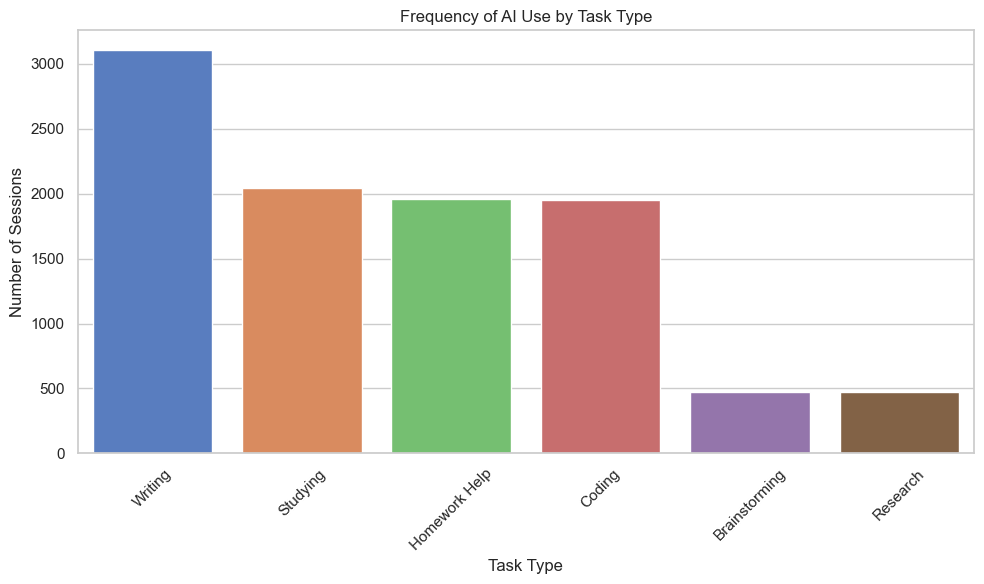

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TaskType', order=df['TaskType'].value_counts().index, palette="muted")
plt.title("Frequency of AI Use by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

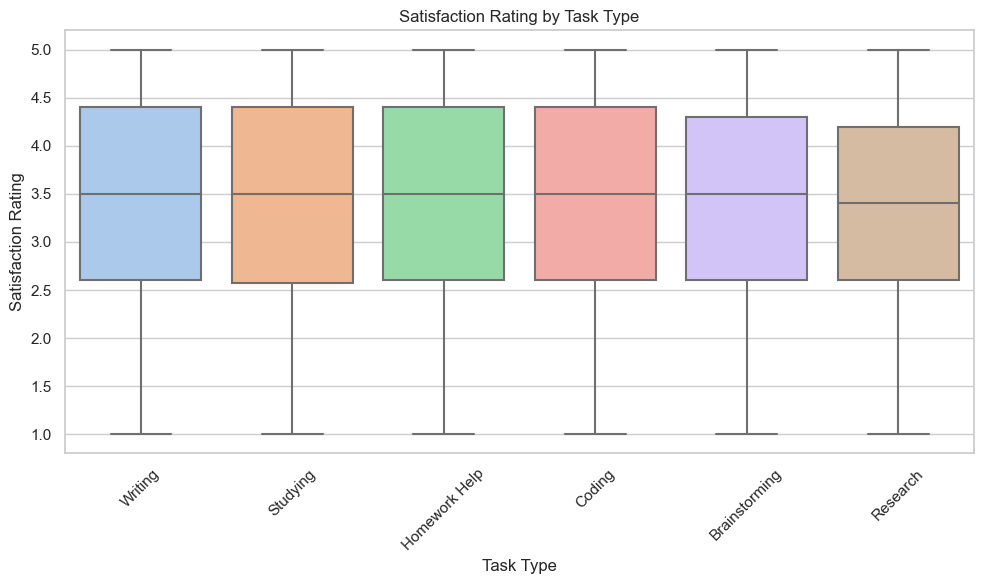

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='TaskType', y='SatisfactionRating', order=df['TaskType'].value_counts().index, palette="pastel")
plt.title("Satisfaction Rating by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Satisfaction Rating")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3560\3315639086.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='TaskType', y='SatisfactionRating', order=df['TaskType'].value_counts().index, ci=None)


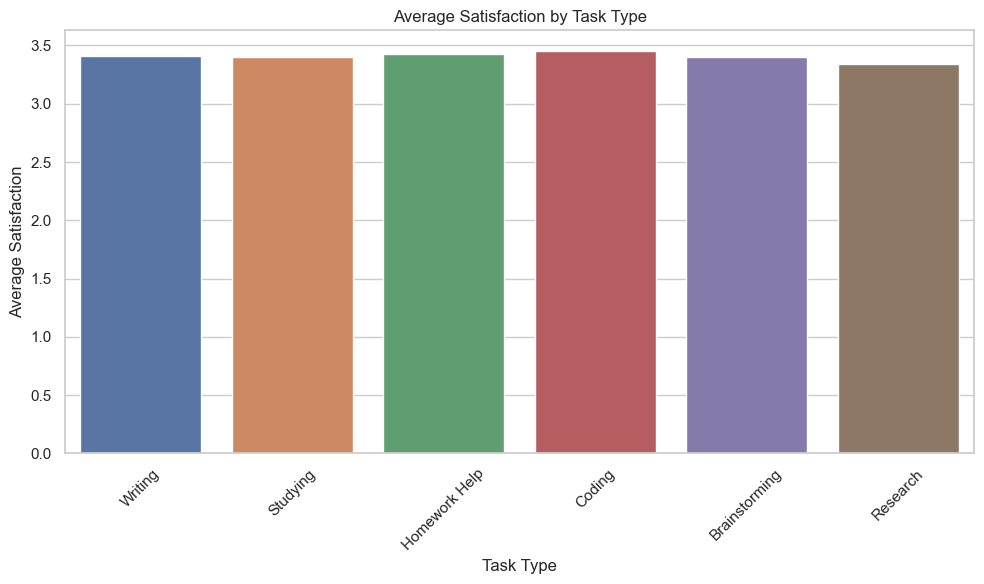

In [41]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='TaskType', y='SatisfactionRating', order=df['TaskType'].value_counts().index, ci=None)
plt.title("Average Satisfaction by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Average Satisfaction")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


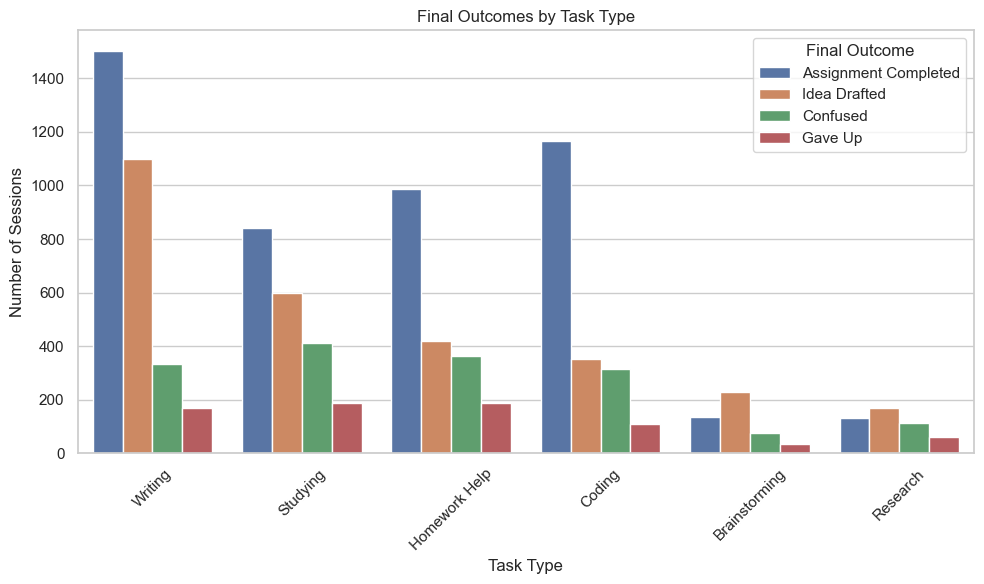

In [43]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TaskType', hue='FinalOutcome', order=df['TaskType'].value_counts().index)
plt.title("Final Outcomes by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.legend(title='Final Outcome')
plt.tight_layout()
plt.show()


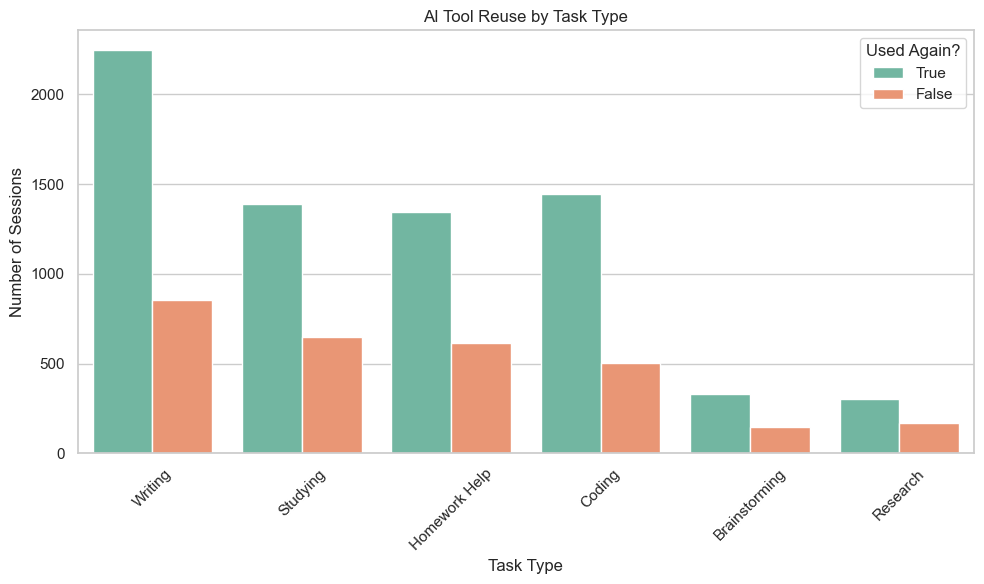

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='TaskType', hue='UsedAgain', order=df['TaskType'].value_counts().index, palette='Set2')
plt.title("AI Tool Reuse by Task Type")
plt.xlabel("Task Type")
plt.ylabel("Number of Sessions")
plt.xticks(rotation=45)
plt.legend(title='Used Again?')
plt.tight_layout()
plt.show()


In [47]:
df['UsedAgain'] = df['UsedAgain'].astype(str)

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score

In [53]:
df_encoded = df.copy()
label_cols = ['TaskType', 'StudentLevel', 'Discipline', 'AI_AssistanceLevel']

le = LabelEncoder()
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [55]:
X = df_encoded[['TaskType', 'StudentLevel', 'Discipline', 'SessionLengthMin', 'TotalPrompts', 'AI_AssistanceLevel']]
y = df_encoded['SatisfactionRating']


In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [59]:
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [61]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 0.58
R² Score: 0.56


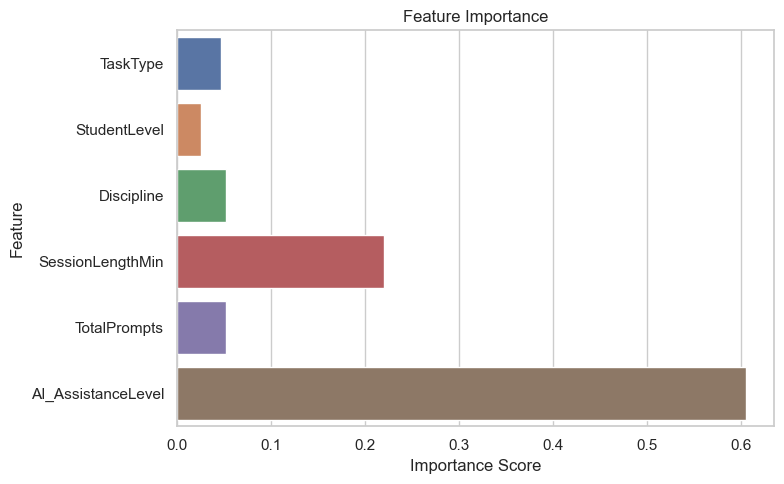

In [63]:
feature_importances = pd.Series(regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [65]:
df['Satisfied'] = df['SatisfactionRating'] >= 4


In [67]:
# Drop columns we won't use
df_model = df.drop(columns=['SessionID', 'SessionDate', 'SatisfactionRating'])

# Convert categorical variables into dummy variables
df_model = pd.get_dummies(df_model, drop_first=True)

# Separate features and target
X = df_model.drop('Satisfied', axis=1)
y = df_model['Satisfied']


In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


In [73]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.772
Classification Report:
               precision    recall  f1-score   support

       False       0.81      0.84      0.82      1272
        True       0.70      0.66      0.68       728

    accuracy                           0.77      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.77      0.77      0.77      2000

Confusion Matrix:
 [[1063  209]
 [ 247  481]]


<Axes: >

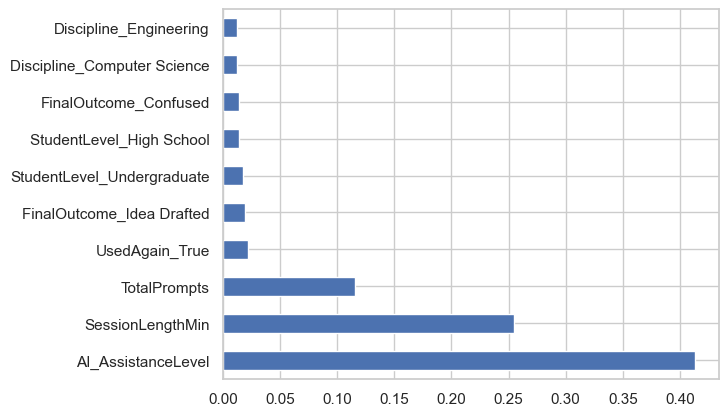

In [75]:
importances = pd.Series(clf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(10).plot(kind='barh')


In [77]:
# Step 1: Select top features and target
top_features = ['AI_AssistanceLevel', 'SessionLengthMin', 'TotalPrompts']
X_top = df[top_features]
y = df['Satisfied']

# Step 2: Train-test split
X_train_top, X_test_top, y_train_top, y_test_top = train_test_split(X_top, y, test_size=0.2, random_state=42)

# Step 3: Train the Random Forest model
rf_top = RandomForestClassifier(random_state=42)
rf_top.fit(X_train_top, y_train_top)

# Step 4: Make predictions and evaluate
y_pred_top = rf_top.predict(X_test_top)

print("Accuracy:", accuracy_score(y_test_top, y_pred_top))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_top))
print("Confusion Matrix:\n", confusion_matrix(y_test_top, y_pred_top))

Accuracy: 0.747

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.80      0.80      1272
        True       0.65      0.65      0.65       728

    accuracy                           0.75      2000
   macro avg       0.73      0.73      0.73      2000
weighted avg       0.75      0.75      0.75      2000

Confusion Matrix:
 [[1018  254]
 [ 252  476]]


In [83]:
from sklearn.linear_model import LogisticRegression

# Step 1: Train logistic regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_top, y_train_top)

# Step 2: Predict and evaluate
y_pred_log = log_reg.predict(X_test_top)

print("Accuracy:", accuracy_score(y_test_top, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test_top, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test_top, y_pred_log))

Accuracy: 0.773

Classification Report:
               precision    recall  f1-score   support

       False       0.91      0.71      0.80      1272
        True       0.64      0.88      0.74       728

    accuracy                           0.77      2000
   macro avg       0.77      0.80      0.77      2000
weighted avg       0.81      0.77      0.78      2000

Confusion Matrix:
 [[903 369]
 [ 85 643]]


In [81]:
LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000)

In [87]:
X = df[['Discipline', 'TaskType', 'TotalPrompts', 'SatisfactionRating']]  # optional to include 'satisfied'
X = pd.get_dummies(X, drop_first=True)
y = df['UsedAgain']

In [89]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.6925

Classification Report:
               precision    recall  f1-score   support

       False       0.00      0.00      0.00       615
        True       0.69      1.00      0.82      1385

    accuracy                           0.69      2000
   macro avg       0.35      0.50      0.41      2000
weighted avg       0.48      0.69      0.57      2000


Confusion Matrix:
 [[   0  615]
 [   0 1385]]


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
